In [154]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [110]:
corpus = pd.read_csv('../data/corpus/ukr_news_2023_1M-words.txt', 
                     sep='\t', 
                     header=None, 
                     index_col=0)
corpus.columns = ['word', 'count']
# lower case
corpus['word'] = corpus['word'].str.lower()
# join identical words and sum their counts
corpus = corpus.groupby('word', as_index=False).sum()

In [111]:
# convert counts into frequencies
corpus['frequency'] = corpus['count'] / corpus['count'].sum()

In [103]:
slovotvir = pd.read_csv('../data/words_translations_cleaned.csv')

In [104]:
# # get top-100 most liked translations
# top_100 = slovotvir.sort_values('rating', ascending=False).head(100)['translation_body'].values

In [175]:
# # get top-100 most liked translations and corresponding words
top_100_w = slovotvir.sort_values('rating', ascending=False).head(2000)[['word_body', 'translation_body']]

In [176]:
words = top_100_w.word_body.unique()
# for each word, extract the translations and store them in a list with their rank (i.e. index in the list based on ranking)
translations = []

for word in words:
    translations.append(slovotvir[slovotvir['word_body'] == word].sort_values('rating', ascending=False)['translation_body'].values)

In [177]:
# create a dataframe from translations with corresponding words and rank (i.e. index in the list based on ranking)

translations = pd.DataFrame(translations, index=words).stack().reset_index()
translations.columns = ['word', 'rank', 'translation']

In [178]:
# for each translation, get the frequency of the translation in the corpus
translations['frequency'] = translations['translation'].map(corpus.set_index('word')['frequency'])

In [179]:
translations.dropna(subset=['frequency'], inplace=True)

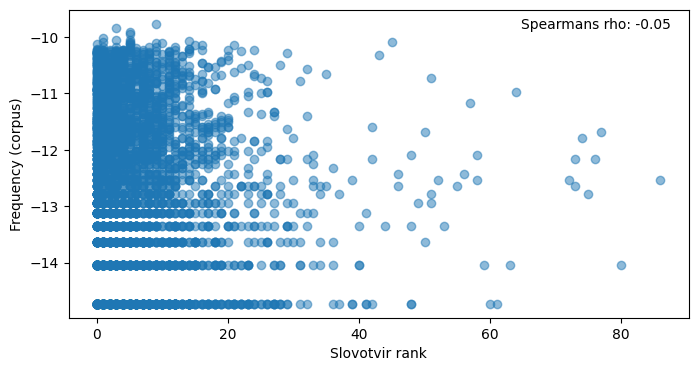

In [180]:
plt.figure(figsize=(8, 4))
plt.scatter(translations['rank'], 
            np.log(translations['frequency'],), alpha=0.5)
# add correlation coefficient in the corner
plt.text(0.85, 0.95, 'Spearmans rho: {:.2f}'.format(translations['rank'].corr(translations['frequency'], method='spearman')),
            horizontalalignment='center',
            verticalalignment='center',
            transform=plt.gca().transAxes)
plt.xlabel('Slovotvir rank')
plt.ylabel('Frequency (corpus)')
plt.show()